In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew 
from scipy.special import boxcox1p

In [2]:
TC = pd.read_csv('./input/Train_call.txt', sep='\t')

In [3]:
TC.describe()

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
count,2834.000000,2.834000e+03,2.834000e+03,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,...,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,10.769231,6.335894e+07,6.434233e+07,82.845095,0.009174,-0.034227,-0.199365,-0.208892,-0.015879,-0.141849,...,-0.039167,0.066690,0.348624,0.024700,0.336627,-0.157375,0.011997,0.022230,0.173959,0.049047
std,6.473031,4.985699e+07,5.017314e+07,118.814507,0.758471,0.620192,0.607739,0.752531,0.534145,0.560173,...,0.661762,0.292509,0.539168,0.394218,0.699164,0.677356,0.701366,0.198476,0.820501,0.601264
min,1.000000,7.120000e+02,2.916900e+04,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,5.000000,2.695314e+07,2.812676e+07,9.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000
50%,11.000000,5.203528e+07,5.280112e+07,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,8.733472e+07,8.827873e+07,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,23.000000,2.453086e+08,2.454338e+08,1522.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000


In [4]:
TC.head() 

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,1,2927,43870,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,1,85022,216735,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,1,370546,372295,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,1,471671,786483,5,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,1,792533,907406,13,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0


In [18]:
str(TC.Chromosome.values[0]) + '_' 

'1_'

In [6]:
TClinical = pd.read_csv('./input/Train_clinical.txt', sep='\t')

In [7]:
TClinical

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg
5,Array.36,HR+
6,Array.49,HER2+
7,Array.16,HER2+
8,Array.146,Triple Neg
9,Array.143,HER2+


In [40]:
TC['biomarkers'] = TC['Chromosome'].map(str) + '_' + TC['Start'].map(str) + '_' + TC['End'].map(str)

In [44]:
TC.head()

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130,biomarkers
0,1,2927,43870,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-1,0,1_2927_43870
1,1,85022,216735,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-1,0,1_85022_216735
2,1,370546,372295,4,0,0,0,0,0,0,...,0,1,0,1,0,0,0,-1,0,1_370546_372295
3,1,471671,786483,5,0,0,0,0,0,0,...,1,1,0,1,0,0,0,-1,0,1_471671_786483
4,1,792533,907406,13,0,0,0,0,0,0,...,1,1,0,1,0,0,0,-1,0,1_792533_907406


In [25]:
TC = TC.drop(columns="biomarkers")

In [27]:
# iterate over rows with iterrows()
for index, row in TC.head().iterrows():
     # access data using column names
     print(index, row['Chromosome'], row['Start'], row['End'])

0 1 2927 43870
1 1 85022 216735
2 1 370546 372295
3 1 471671 786483
4 1 792533 907406


In [45]:
tf_TC = TC.drop(columns=["Chromosome", "Start", "End", "Nclone"])

In [47]:
# Get the DataFrame column names as a list
clist = list(tf_TC.columns)

# Rearrange list the way you like 
clist_new = clist[-1:]+clist[:-1]   # brings the last column in the first place

# Pass the new list to the DataFrame - like a key list in a dict 
tf_TC = tf_TC[clist_new]
tf_TC

,biomarkers,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,Array.49,Array.16,Array.146,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,1_2927_43870,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,1_85022_216735,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,1_370546_372295,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,1_471671_786483,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,1_792533_907406,0,0,0,0,0,0,0,-1,0,...,0,1,1,0,1,0,0,0,-1,0
5,1_912799_1266212,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
6,1_1271190_1590570,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
7,1_1676445_1703748,0,0,0,-1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
8,1_1738295_2477597,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
9,1_2481927_2562342,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0


In [48]:
TCall = tf_TC.T

In [50]:
TCall.head()

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
biomarkers,1_2927_43870,1_85022_216735,1_370546_372295,1_471671_786483,1_792533_907406,1_912799_1266212,1_1271190_1590570,1_1676445_1703748,1_1738295_2477597,1_2481927_2562342,...,23_151067607_152416606,23_152422390_152548587,23_152552851_152570071,23_152576854_152935130,23_152994680_153054487,23_153062077_153452633,23_153466463_153491568,23_153504394_153933426,23_153938998_153989329,23_153997146_154492924
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
Array.34,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.67,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.24,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
TCall.to_csv('modified_train_call.csv', index=True)

In [57]:
md_TC = pd.read_csv('modified_train_call.csv')

In [59]:
result = pd.merge(md_TC,
                  TClinical[['Sample', 'Subgroup']],
                  on=['Sample'],
                  how='left')

In [72]:
result['Subgroup'] = result['Subgroup'].map({'HER2+': 0, 'HR+': 1, 'Triple Neg': 2})

In [76]:
result

,1_2927_43870,1_85022_216735,1_370546_372295,1_471671_786483,1_792533_907406,1_912799_1266212,1_1271190_1590570,1_1676445_1703748,1_1738295_2477597,1_2481927_2562342,...,23_152422390_152548587,23_152552851_152570071,23_152576854_152935130,23_152994680_153054487,23_153062077_153452633,23_153466463_153491568,23_153504394_153933426,23_153938998_153989329,23_153997146_154492924,Subgroup
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2
5,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
6,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
7,0,0,0,0,-1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2
9,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [83]:
features_list = np.array(result.columns).tolist()

In [84]:
features_list.remove('Subgroup')

In [85]:
features_list

['1_2927_43870',
 '1_85022_216735',
 '1_370546_372295',
 '1_471671_786483',
 '1_792533_907406',
 '1_912799_1266212',
 '1_1271190_1590570',
 '1_1676445_1703748',
 '1_1738295_2477597',
 '1_2481927_2562342',
 '1_2574555_2580342',
 '1_2611444_2641811',
 '1_2643540_2645074',
 '1_2664285_2665530',
 '1_2672694_2832087',
 '1_2854198_2856899',
 '1_2870100_2880675',
 '1_2882919_2901629',
 '1_2903052_3112977',
 '1_3125822_3135062',
 '1_3136815_3137481',
 '1_3149648_3157982',
 '1_3166706_3521038',
 '1_3521345_3798798',
 '1_3810936_6606212',
 '1_6613363_8038878',
 '1_8050444_10537398',
 '1_10551320_12533269',
 '1_12544104_12768740',
 '1_12774453_12788158',
 '1_12800742_12805297',
 '1_12833868_13002452',
 '1_13520352_15852641',
 '1_15858551_16119613',
 '1_16126501_16531740',
 '1_16551324_16592466',
 '1_16672053_16680432',
 '1_16693433_16750002',
 '1_16757397_16794038',
 '1_16799163_16836986',
 '1_16954838_16997273',
 '1_17030134_17037487',
 '1_17042808_19187091',
 '1_19200088_21470929',
 '1_21483025

In [61]:
result = result.drop(columns="Sample")

In [74]:
from sklearn.feature_selection import SelectKBest
k_best = SelectKBest(k=10)
k_best.fit(result, result['Subgroup'])
scores = k_best.scores_

/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [2834] are constant.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [75]:
scores

array([0.13326444, 0.29393939, 0.52163142, ..., 0.2870674 , 0.18086845,
              inf])

In [86]:
pairs = zip(features_list[1:], scores)

In [90]:
k_best_features = pd.DataFrame(list(pairs), columns=['feature', 'score'])

In [94]:
k_best_features = k_best_features.sort_values('score', ascending=False)

In [96]:
k_best_features[:20]

,feature,score
2184,17_35286565_35336158,199.029942
2213,17_41458670_41494331,15.348406
1678,12_85986743_87258350,14.615521
2214,17_41527705_41566540,13.706823
1656,12_66035532_66948440,13.180412
1664,12_71710336_71905426,12.971784
854,6_135520431_136095714,12.794493
1677,12_85450052_85962613,12.781829
1667,12_73217711_73482351,12.656842
2210,17_40859120_40926154,12.433844


In [108]:
COLUMNS = k_best_features[:20]['feature'].values.tolist()

In [109]:
COLUMNS.append('Subgroup')

In [110]:
cor_result = result[COLUMNS]

In [111]:
COLUMNS

['17_35286565_35336158',
 '17_41458670_41494331',
 '12_85986743_87258350',
 '17_41527705_41566540',
 '12_66035532_66948440',
 '12_71710336_71905426',
 '6_135520431_136095714',
 '12_85450052_85962613',
 '12_73217711_73482351',
 '17_40859120_40926154',
 '12_87329145_88538415',
 '12_82881635_83804633',
 '12_70574871_71644041',
 '5_70716278_70721505',
 '12_70462057_70560603',
 '12_73523915_74655845',
 '17_43100477_43148025',
 '17_38077519_38710043',
 '17_38784700_39114890',
 '12_75706042_77012738',
 'Subgroup']

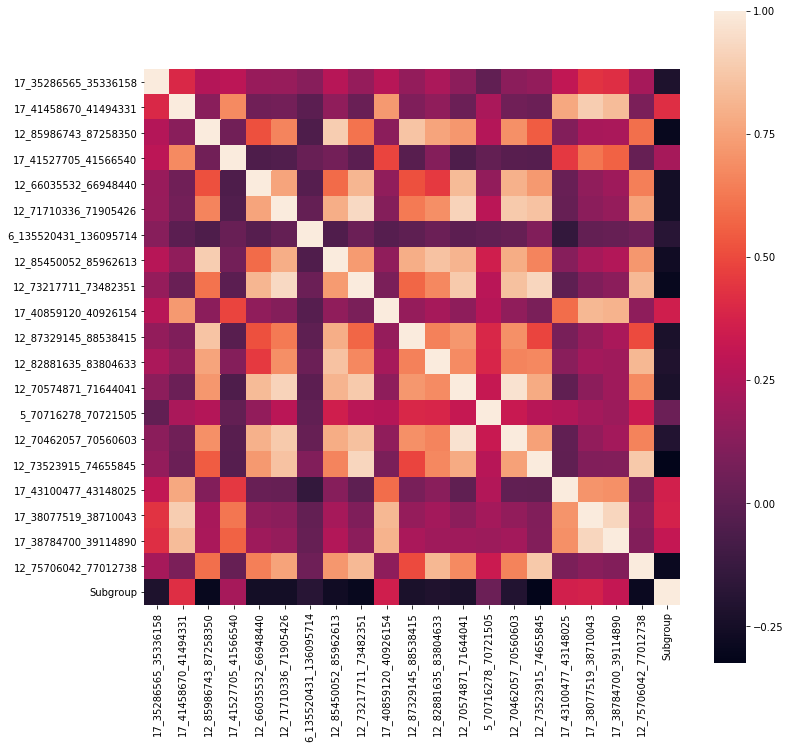

In [112]:
corrmat = cor_result.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=1, square=True);

In [115]:
s_value = pd.unique(result['17_35286565_35336158'])

In [117]:
len(s_value)

4